In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# # Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

# # Perform API calls

In [3]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("--------------------------")
print("Beginning Data Retrieval")
print("--------------------------")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Started
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | jalu
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | komsomolskiy
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | muroto
Processing Record 16 of Set 1 | kuche
City not found. Skipping...
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | puerto colombia
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | diglur
Proc

Processing Record 35 of Set 4 | usak
Processing Record 36 of Set 4 | barra do pirai
Processing Record 37 of Set 4 | chifeng
Processing Record 38 of Set 4 | cayenne
Processing Record 39 of Set 4 | palu
Processing Record 40 of Set 4 | takoradi
Processing Record 41 of Set 4 | tessalit
Processing Record 42 of Set 4 | ancud
Processing Record 43 of Set 4 | dipkarpaz
City not found. Skipping...
Processing Record 44 of Set 4 | ukiah
Processing Record 45 of Set 4 | nosy varika
Processing Record 46 of Set 4 | mount isa
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | opuwo
Processing Record 49 of Set 4 | port blair
Processing Record 50 of Set 4 | shingu
Processing Record 1 of Set 5 | halifax
Processing Record 2 of Set 5 | krechevitsy
Processing Record 3 of Set 5 | steamboat springs
Processing Record 4 of Set 5 | sur
Processing Record 5 of Set 5 | beatrice
Processing Record 6 of Set 5 | polunochnoye
Processing Record 7 of Set 5 | apia
Processing Record 8 of Set 5 | maragheh
Pr

Processing Record 30 of Set 8 | verkhoyansk
Processing Record 31 of Set 8 | mabaruma
Processing Record 32 of Set 8 | coihaique
Processing Record 33 of Set 8 | kisangani
Processing Record 34 of Set 8 | los llanos de aridane
Processing Record 35 of Set 8 | bitung
Processing Record 36 of Set 8 | oyem
Processing Record 37 of Set 8 | naze
Processing Record 38 of Set 8 | sokol
Processing Record 39 of Set 8 | ahar
Processing Record 40 of Set 8 | khonuu
City not found. Skipping...
Processing Record 41 of Set 8 | half moon bay
Processing Record 42 of Set 8 | muros
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 8 | stoyba
City not found. Skipping...
Processing Record 46 of Set 8 | kampot
Processing Record 47 of Set 8 | mukhanovo
City not found. Skipping...
Processing Record 48 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 49 of Set 8 | dibulla
Processing Record 50 of Set 8 | grand

Processing Record 18 of Set 12 | trujillo
Processing Record 19 of Set 12 | ahome
Processing Record 20 of Set 12 | praia da vitoria
Processing Record 21 of Set 12 | cabcab
Processing Record 22 of Set 12 | nabire
Processing Record 23 of Set 12 | barranca
Processing Record 24 of Set 12 | lethem
Processing Record 25 of Set 12 | djambala
Processing Record 26 of Set 12 | kolokani
Processing Record 27 of Set 12 | belle fourche
Processing Record 28 of Set 12 | pemangkat
Processing Record 29 of Set 12 | ingham
Processing Record 30 of Set 12 | sibolga
Processing Record 31 of Set 12 | loukhi
Processing Record 32 of Set 12 | nantucket
Processing Record 33 of Set 12 | mackenzie
Processing Record 34 of Set 12 | ifanadiana
Processing Record 35 of Set 12 | albertville
Processing Record 36 of Set 12 | sakakah
Processing Record 37 of Set 12 | tabialan
City not found. Skipping...
Processing Record 38 of Set 12 | pringsewu
Processing Record 39 of Set 12 | mayor pablo lagerenza
Processing Record 40 of Set 

# Convert Raw Data to DataFrame¶
Export the city data into a .csv.
Display the DataFrame

In [4]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [7]:
# Display the DF
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,19,ZA,1595951511,58,-33.93,18.42,61.00,19.46
1,Bluff,100,NZ,1595951512,85,-46.60,168.33,43.00,11.72
2,Thompson,90,CA,1595951432,93,55.74,-97.86,59.00,5.82
3,Bambous Virieux,40,MU,1595951512,78,-20.34,57.76,71.60,8.05
4,Jalu,0,LY,1595951512,19,29.03,21.55,97.54,11.59


In [8]:
# Export the City_Data into a csv
weather_df.to_csv(output_data_file, index=None, header=True)

# Plotting the Data¶
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

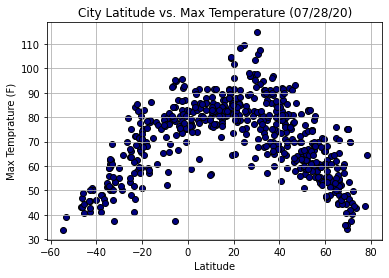

In [12]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.savefig("Figure1.png")
plt.show()

# Latitude vs. Humidity Plot

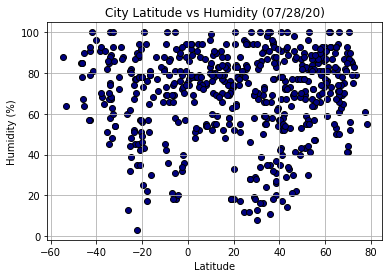

In [13]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Figure2.png")
plt.show()

# Latitude vs. Cloudiness Plot

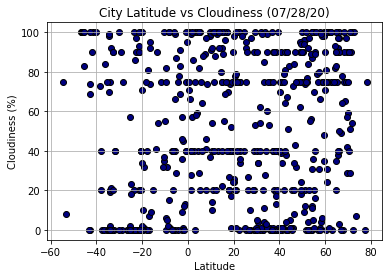

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Figure3.png")
plt.show()

# Latitude vs. Wind Speed Plot

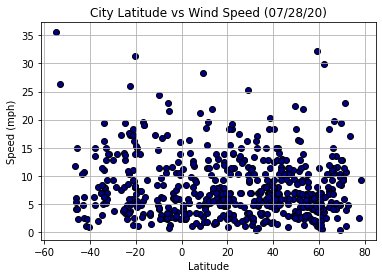

In [15]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("Figure4.png")
plt.show()